In [2]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Comm():
    def __init__(self):
        self.comm_world = self.Comm_World()
    class Comm_World():
        def __init__(self):
            self.size = 1
            self.rank = 0

In [12]:
comm = Comm()

In [14]:
comm.comm_world.rank

0

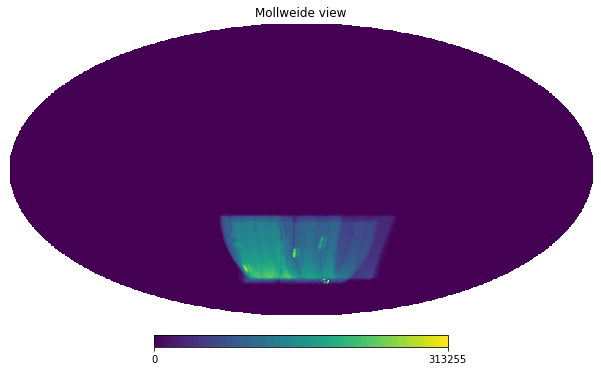

In [29]:
path = 'toast_maps/data_telescope_all_time_all_hits.fits'
m = hp.read_map(path, dtype=np.float64, verbose=False)
lon, lat = hp.pix2ang(nside = 128, ipix = np.where(m == np.max(m))[0], lonlat=True)
hp.mollview(m)

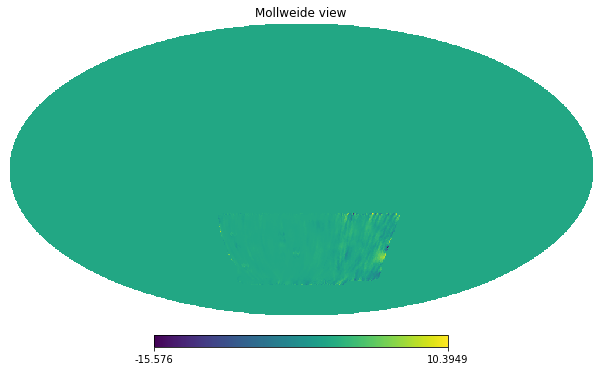

In [30]:
path = 'toast_maps/data_telescope_all_time_all_binned.fits'
m = hp.read_map(path, field=None, dtype=np.float64, verbose=False)
hp.mollview(m[0], xsize=1000)

In [24]:
#Coadd attempt
m1 = hp.read_map('toast_maps_0/data_telescope_all_time_all_binned.fits', dtype=np.float64, verbose=False)
m2 = hp.read_map('toast_maps_1/data_telescope_all_time_all_binned.fits', dtype=np.float64, verbose=False)
m = hp.read_map('toast_maps/data_telescope_all_time_all_binned.fits', dtype=np.float64, verbose=False)

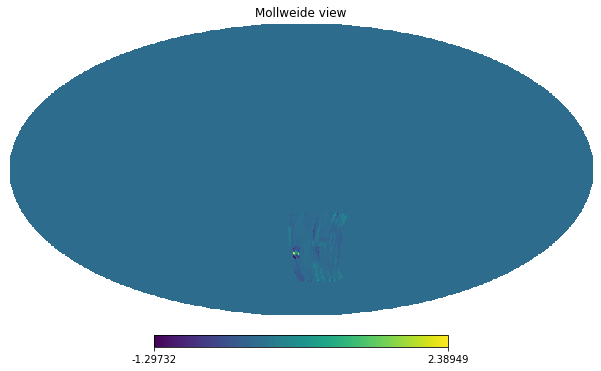

In [6]:
hp.mollview(m1+m2)

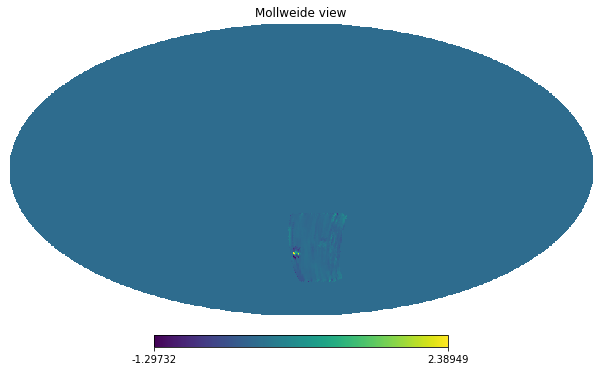

In [7]:
hp.mollview(m)

In [23]:
wcov1 = hp.read_map('toast_maps_0/data_telescope_all_time_all_invnpp.fits', dtype=np.float64, verbose=False)
wcov2 = hp.read_map('toast_maps_1/data_telescope_all_time_all_invnpp.fits', dtype=np.float64, verbose=False)

In [9]:
inter = np.intersect1d(np.where(m1!=0)[0], np.where(m2!=0)[0])
len(inter)

626

In [10]:
inters = []
for pixel in inter:
    value = wcov1[pixel] * m1[pixel] + wcov2[pixel] * m2[pixel]
    value /= wcov1[pixel] + wcov2[pixel]
    inters.append(value)

In [11]:
coadded_map = m1+m2
coadded_map[inter] = inters

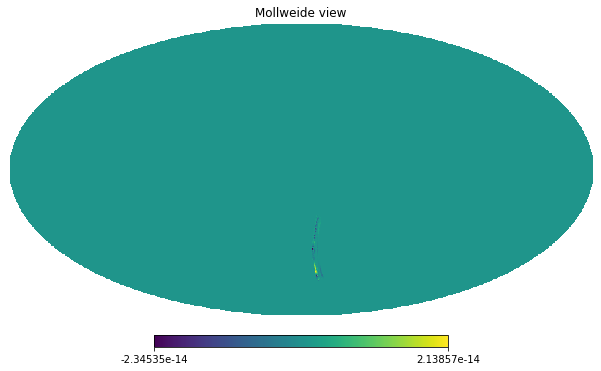

In [14]:
hp.mollview(coadded_map-m)

In [35]:
coadded_map1[183633]

0.17575814455121858

/global/common/software/cmb/cori/cmbenv-gcc_20200630/cmbenv_python/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


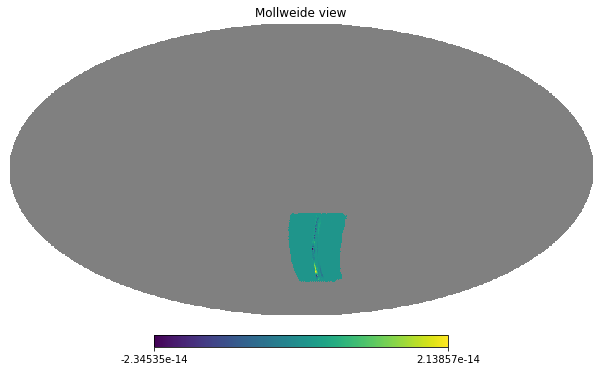

In [26]:
wcovs = [wcov1, wcov2]
maps = [m1, m2]

coadded_map1 = np.sum(np.array(wcovs) * np.array(maps), axis=0) / np.sum(wcovs, axis=0) 

hp.mollview(coadded_map1-m)

In [38]:
coadd = hp.read_map('coadded_map.fits', dtype=np.float64, verbose=False)

In [39]:
coadd[183633]

0.17575814455121858

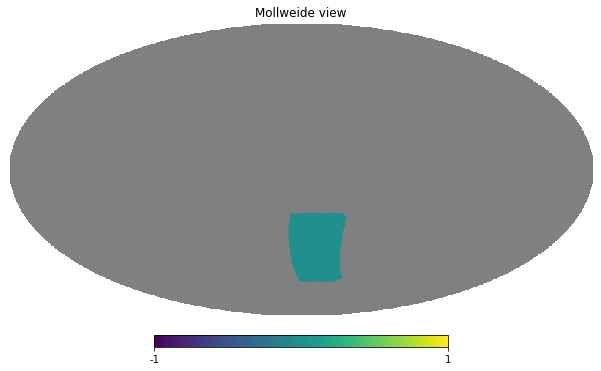

In [40]:
hp.mollview(coadd-coadded_map1)

In [4]:
np.allclose(coadd, original)

False

In [6]:
len(np.where(np.isnan(m[0]))[0])

0

In [19]:
az = np.load('az.npy')
el = np.load('el.npy')

(0, 20000)

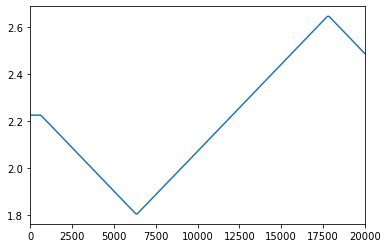

In [24]:
plt.plot(az)
plt.xlim([0,20000])

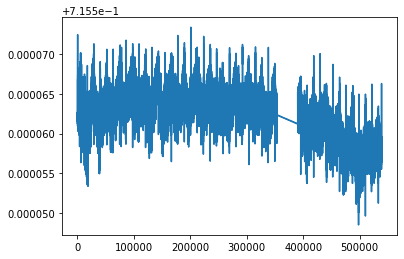

In [20]:
plt.plot(el)

In [21]:
std = np.load('std.npy')

In [ ]:
stdp

In [221]:
pre_tod = np.load('prefilter_tod.npy')
post_tod = np.load('postfilter_tod.npy')

(-250.0, 250.0)

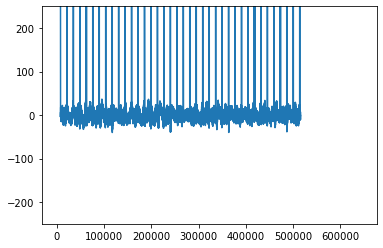

In [229]:
#plt.plot(pre_tod)
plt.plot(post_tod)
plt.ylim([-250,250])

In [4]:
nside = 512
npix = hp.nside2npix(nside)

In [5]:
#CONTOUR LINES
cutoff = 2e5
so_depth[(so_depth>cutoff)] = cutoff

lines = np.array([0.9, 0.7, 0.5, 0.3, 0.1, 0.01]) * cutoff

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


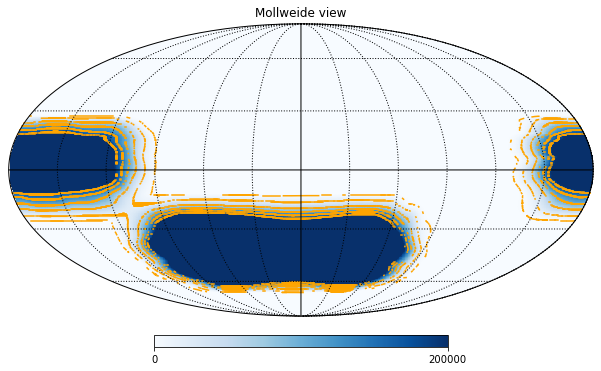

In [6]:
hp.mollview(so_depth, cmap='Blues')
for value in lines:
    ipix = np.where(np.isclose(so_depth, value, rtol=1e-2, atol=0))[0]
    theta, phi = hp.pix2ang(nside, ipix)
    hp.projplot(theta, phi, color='orange')
hp.graticule()

In [12]:
c = [(1,2)]

In [13]:
for i in c:
    print(i)

(1, 2)


In [5]:
patch = np.zeros(npix)
indices = np.arange(npix)
RA, dec = pix2radec(nside, indices)
RA[(RA<-180)] += 360

NameError: name 'pix2radec' is not defined

In [3]:
south = indices[(dec> -65) & (dec<-25) & (RA>-45) & (RA<70)]
north1 = indices[(dec> -10) & (dec< 10) & (RA<-130) & (RA>-180)]
north2 = indices[(dec> -10) & (dec< 10) & (RA>130) & (RA<180)]

NameError: name 'indices' is not defined

In [30]:
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
 
cmap_colors = get_cmap('binary', 256)(np.linspace(0, 1, 256))
cmap_colors[..., 3] = 0.1  # Make colormap partially transparent
cmap = ListedColormap(cmap_colors)

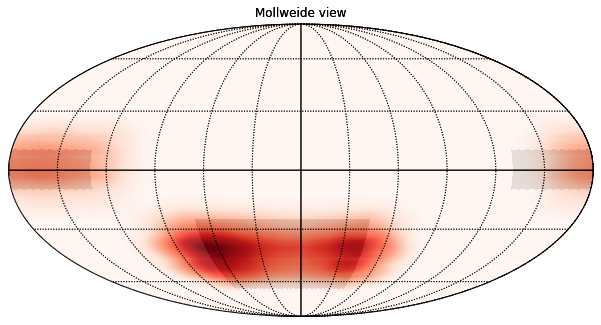

In [34]:
patch[south] = 1
patch[north1] = 1
patch[north2] = 1

hp.mollview(so_map, fig=0, cmap='Reds', xsize=2000, cbar=False)
hp.mollview(patch, fig=0, cmap=cmap, xsize=2000, reuse_axes=False, cbar=False)
hp.graticule()

In [32]:
cmap_colors

array([[1.        , 1.        , 1.        , 0.1       ],
       [0.99607843, 0.99607843, 0.99607843, 0.1       ],
       [0.99215686, 0.99215686, 0.99215686, 0.1       ],
       ...,
       [0.00784314, 0.00784314, 0.00784314, 0.1       ],
       [0.00392157, 0.00392157, 0.00392157, 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ]])